# Test SAM Indeces Calc

Nicki did a convincing write up of the method to apply here:

https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

1. Grab PSL and 40S and 65S for all lon
2. Calculate latitdue means for each month
3. Normalise based on 1971 to 2000 for each lat
4. Sam index is then the difference between the normalised lasts (P40-P65)

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime
import utils.sstIndex as sst
import utils._indexDefinitions as _index
import xarray

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
ds1 = fh.loadModelData('CESM-LME', 'PSL', '002', drop_variables=('hyam', 'hybm', 'hyai', 'hybi', 'P0', 'date', 'n2ovmr','datesec','w_stag','time_bnds', 'date_written', 'time_written', 'ntrm', 'ntrn', 'ntrk','ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'nlon', 'wnummax', 'gw', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n20vmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph' ))
ds2 = fh.loadModelData('CESM-LME', 'PSL', 'LME.002', drop_variables=('hyam', 'hybm', 'hyai', 'hybi', 'P0', 'date', 'n2ovmr','datesec','w_stag','time_bnds', 'date_written', 'time_written', 'ntrm', 'ntrn', 'ntrk','ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'nlon', 'wnummax', 'gw', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n20vmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph' ))

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.085001-184912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.185001-200512.nc']
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BRCP85C5CN.f19_g16.LME.002.cam.h0.PSL.200601-210012.nc']


In [3]:
ds=xarray.concat([ds1, ds2], dim='time')

In [4]:
ds40=ds.sel(lat=-40,method='nearest', drop=True).mean(dim='lon')
ds65=ds.sel(lat=-65,method='nearest', drop=True).mean(dim='lon')

In [5]:
def normalisePSL(x):
    xMonthly=x.PSL.groupby('time.month')
    xClimatology=x.PSL.sel(
        time=slice(cftime.DatetimeNoLeap(1961,2,1),cftime.DatetimeNoLeap(1991,1,1))
        ).groupby('time.month')
    xAnom=(xMonthly-xClimatology.mean(dim='time')).groupby('time.month')
    xStd=xClimatology.std(dim='time')
   
    return xAnom/xStd

In [6]:
samIndex=normalisePSL(ds40)-normalisePSL(ds65)
samIndex.rename('sam')

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 417 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 417 times more chunks
  return self.array[key]


,Array,Chunk
Bytes,60.05 kB,4 B
Shape,"(15012,)","(1,)"
Count,165667 Tasks,15012 Chunks
Type,float32,numpy.ndarray


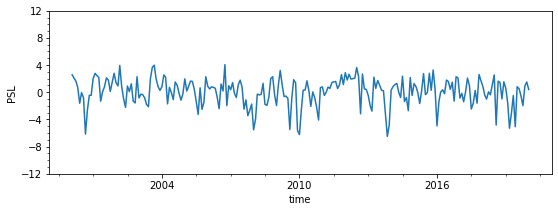

In [9]:

#The result should be the same as 
# https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20index%20tests.ipynb (Section 1)

plotArea=samIndex.sel(time=slice(cftime.DatetimeNoLeap(2000,2,1), cftime.DatetimeNoLeap(2020,1,1)))
plotArea.plot(x='time', figsize=(9,3))



plt.ylim(-12,12)
plt.yticks(numpy.arange(-12,14,4))
plt.minorticks_on()


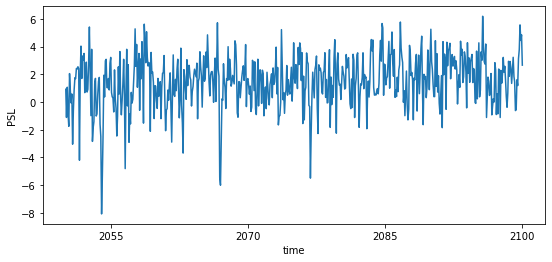

In [8]:
samIndex.sel(time=slice(cftime.DatetimeNoLeap(2050,2,1), cftime.DatetimeNoLeap(2100,1,1))).plot(x='time', figsize=(9,4))